# Data Preprocessing UCI 303

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CleavelandHeartUCI.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Dataset Details

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [7]:
dataset.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  target  
0        3  0.0   6.0  

In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
dataset.values.any()

True

## Remove Missing Data

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
data = dataset.copy()

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
## For Chi Test
X1 = data.iloc[:,0:13] #independent columns
y1 = data.iloc[:,-1] #target column

##  Independent and Dependent Variables

In [17]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

### Independent variables (also referred to as Features) are the input for a process that is being analyzes

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


### Dependent variables are the output of the process.

In [19]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

### Objective 1 Achieved the objective to identify the significant features based on scores from both methods.

## Filter Based Feature Selections with Chi-Test

In [20]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(13,'Score')) #print best features

       Specs       Score
7    thalach  187.053104
11        ca   82.730613
9    oldpeak   68.570533
12      thal   65.221093
8      exang   35.508090
0        age   22.917697
4       chol   20.855084
3   trestbps   16.707463
2         cp   14.591587
6    restecg    8.134652
10     slope    7.828836
1        sex    7.444195
5        fbs    0.002547


In [21]:
featureScores

,Specs,Score
0,age,22.917697
1,sex,7.444195
2,cp,14.591587
3,trestbps,16.707463
4,chol,20.855084
5,fbs,0.002547
6,restecg,8.134652
7,thalach,187.053104
8,exang,35.508090
9,oldpeak,68.570533


In [22]:
##featureScores.to_csv("FS-CHI.csv")

Text(0, 0.5, 'Scores')

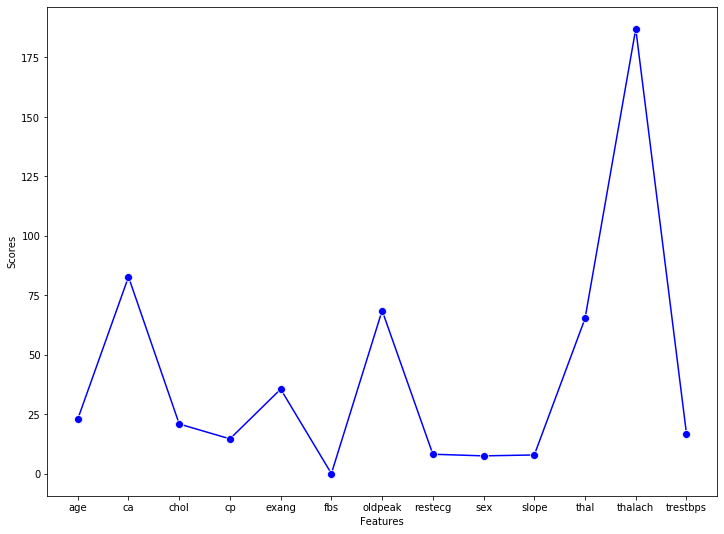

In [23]:
# line plot with x and y values defined
import matplotlib.pyplot as plt
#featureScores.plot.line(x="Featrues",y=" Scores", title="Chi-Square Score Test")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(figsize=(12, 9))
#featureScores.plot(x='Specs',y='Score',title="Chi-Square Score Test",color='blue',marker='o',markerfacecolor='blue', markersize=8,linewidth=1.5,scale_factor = '5')
p=sns.lineplot(x='Specs',y= 'Score',color='blue',marker='o',markersize=8,ax=axes,data=featureScores)

p.set_xlabel("Features", fontsize = 10)
p.set_ylabel("Scores", fontsize = 10)


## Objective 2 Hyper parameter tuning with SVM with FS 9 Atttrtibutes of CHI

### Achieved the objective to find the best hyper parameter tuning for classification model 

## Feature Selection CHI=Square with 9 Features ; Remove fbs,sex,slope,restecg

In [24]:
import random
random.seed(101)
y = data['target'].copy()
x = data.drop(['target','fbs','sex','slope','restecg'], axis=1).copy()
y

xpy=x
ypy=y

### 13 Atttributes chosen for the model evaluation

In [25]:
x

,age,cp,trestbps,chol,thalach,exang,oldpeak,ca,thal
0,63,1,145,233,150,0,2.3,0.0,6.0
1,67,4,160,286,108,1,1.5,3.0,3.0
2,67,4,120,229,129,1,2.6,2.0,7.0
3,37,3,130,250,187,0,3.5,0.0,3.0
4,41,2,130,204,172,0,1.4,0.0,3.0
...,...,...,...,...,...,...,...,...,...
297,57,4,140,241,123,1,0.2,0.0,7.0
298,45,1,110,264,132,0,1.2,0.0,7.0
299,68,4,144,193,141,0,3.4,2.0,7.0
300,57,4,130,131,115,1,1.2,1.0,7.0


In [26]:
x = np.array(x, dtype='float32')

In [27]:
y = np.array(y, dtype='float32')

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [29]:
import random
random.seed(101)
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.2, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [30]:
trainX

array([[ 1.1752458 ,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.329969  ,  1.1325955 ],
       [-1.3568748 , -2.2797935 ,  0.90136725, ..., -0.21644954,
         1.4012382 , -0.9243021 ],
       [ 1.3954302 , -0.19365042,  1.1202443 , ..., -0.90967315,
         0.329969  , -0.9243021 ],
       ...,
       [-0.14586055,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [-0.03576835, -0.19365042,  0.1900167 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [ 0.18441604, -1.236722  ,  0.46361306, ...,  0.21681513,
        -0.74130017, -0.9243021 ]], dtype=float32)

In [31]:
QC = pd.DataFrame(trainX)

In [32]:
QC

,0,1,2,3,4,5,6,7,8
0,1.175246,0.849421,0.190017,0.115956,-0.931131,-0.720577,1.516609,0.329969,1.132596
1,-1.356875,-2.279794,0.901367,-0.075954,1.227814,-0.720577,-0.216450,1.401238,-0.924302
2,1.395430,-0.193650,1.120244,0.557349,0.973821,-0.720577,-0.909673,0.329969,-0.924302
3,0.844969,0.849421,1.010806,-0.075954,0.211840,1.387777,0.303468,-0.741300,-0.924302
4,-1.907336,-0.193650,-0.630772,-0.632494,0.889156,-0.720577,-0.909673,-0.741300,-0.924302
...,...,...,...,...,...,...,...,...,...
232,1.175246,0.849421,1.010806,-0.440584,-1.481450,-0.720577,-0.043144,2.472507,1.132596
233,1.175246,-0.193650,1.557998,2.150204,0.084843,-0.720577,-0.216450,-0.741300,-0.924302
234,-0.145861,0.849421,0.354174,-0.267864,0.465833,-0.720577,-0.909673,-0.741300,-0.924302
235,-0.035768,-0.193650,0.190017,1.075507,0.889156,-0.720577,-0.909673,-0.741300,-0.924302


In [33]:
testX

array([[ 2.3862600e+00, -1.9365042e-01,  4.6361306e-01, -9.7793216e-01,
        -1.3967859e+00, -7.2057664e-01,  4.3509305e-02, -7.4130017e-01,
        -9.2430210e-01],
       [ 5.1469266e-01, -2.2797935e+00,  1.3529743e-01, -8.4359503e-01,
         5.5049795e-01, -7.2057664e-01, -2.1644954e-01,  1.4012382e+00,
        -9.2430210e-01],
       [ 1.6156147e+00, -1.9365042e-01,  4.6361306e-01,  1.1595585e-01,
        -1.2681815e-01, -7.2057664e-01,  8.2338578e-01,  2.4725072e+00,
         1.1325955e+00],
       [ 1.8357991e+00,  8.4942120e-01, -1.0685265e+00, -1.8991011e+00,
        -1.0157956e+00, -7.2057664e-01,  4.7677404e-01, -7.4130017e-01,
        -9.2430210e-01],
       [ 7.4323855e-02, -1.2367220e+00,  1.9001670e-01,  3.9191786e-02,
         5.0816566e-01, -7.2057664e-01,  3.0346808e-01, -7.4130017e-01,
        -9.2430210e-01],
       [ 9.5506144e-01,  8.4942120e-01,  4.6361306e-01, -1.1698424e+00,
        -2.1148266e-01,  1.3877773e+00,  2.5564446e+00,  1.4012382e+00,
         1.

### The chosen parameters will be linear  and previous findings find that rbf seem like overfit the accuracy model 

In [34]:
parameters = {'kernel':('rbf', 'linear'), 'C':[1.0, 10.0, 100.0, 1000.0],
              'gamma':[1,0.1,0.01]}

## p2 setting Kernel with RBF with C 100

In [35]:
p2 = {'kernel':('rbf', 'rbf'), 'C':[100.0, 100.0],
              'gamma':[0.1,0.1]}

## p22 C Setting to 100

In [36]:
p22 = {'kernel':('linear', 'linear'), 'C':[100.0, 100.0],
              'gamma':[0.1,0.1]}

## p3 C Kernel RBF and C :0.5

In [37]:
p3 = {'kernel':('rbf', 'rbf'), 'C':[0.5, 0.5],
              'gamma':[0.1,0.1]}

## p33 C Setting to 100

In [38]:
p33 = {'kernel':('linear', 'linear'), 'C':[1000.0, 1000.0],
              'gamma':[0.1,0.1]}

In [39]:
import random
random.seed(101)
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

model = svm.SVC()
clf = GridSearchCV(model, parameters, verbose=2 ,cv=10)

## Original Parameter tuning 

In [40]:
clf.fit(trainX, trainY)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.0, gamma=1,

[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=100.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   1.8s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .................C=1000.0, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [1, 0.1, 0.01], 'kernel': ('rbf', 'linear')},
             verbose=2)

In [41]:
svc_best_param = clf.best_params_
print(" Objective 2 to achieve Best parameter for SVM:", svc_best_param)

 Objective 2 to achieve Best parameter for SVM: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}


## Table 4.9

In [42]:
import random
random.seed(101)
predict = clf.predict(testX)
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85        40
         1.0       0.68      0.75      0.71        20

    accuracy                           0.80        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.81      0.80      0.80        60

[[33  7]
 [ 5 15]]


In [43]:
svc_accuracy_score = accuracy_score(testY, predict)
print("Best accuracy for SVM:", svc_accuracy_score)

Best accuracy for SVM: 0.8


# Objective 2 Hyper parameter tuning with RF with FS 9 Attributes of CHI

### RF More trees also mean more computational cost and after a certain number of trees, the improvement is negligible

### The depth of the tree meaning length of tree you desire. Larger tree helps you to convey more info whereas smaller tree gives less precise info.So depth should large enough to split each node to your desired number of observations.

As you increase max depth you increase variance and decrease bias. On the other hand, as you increase min samples leaf you decrease variance and increase bias.

So, these parameters will control the level of regularization when growing the trees. In summary, decreasing any of the max* parameters and increasing any of the min* parameters will increase regularization.

More trees usually means higher accuracy at the cost of slower learning. If you wish to speed up your random forest, lower the number of estimators. If you want to increase the accuracy of your model, increase the number of trees. Specify the maximum number of features to be included at each node split

### Achieved the objective to find the best hyper parameter tuning for classification model 

In [86]:
##Define another set of data 

import random
random.seed(100)
y3 = data['target'].copy()
y3 = np.array(y3, dtype='float32')
x3 = data.drop('target', axis=1).copy()
x3 = np.array(x3, dtype='float32')

In [87]:
import random
random.seed(101)
RtrainX =trainX
RtestX=testX
RtrainY=trainY
RtestY=testY

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [89]:
from sklearn.model_selection import train_test_split
#(RtrainX, RtestX, RtrainY, RtestY) = train_test_split(x3,y3, test_size=0.2, random_state=101)

RtrainX=std_scaler.fit_transform(RtrainX)
RtestX=std_scaler.transform(RtestX)

In [90]:
## Setting hyper parameters for Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
#Original Settting before correction
parameters = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini','entropy']
   }

In [93]:
parameters1 = {
    'max_depth' : [3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'criterion' :['gini','entropy']
   }

## Optional Further Tuning 

parameters1 = {
    'n_estimators': [15,25,50,100,200],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'criterion' :['gini','entropy']
   }

In [94]:
parameters_rf3 = {
    'max_depth' : [0,3],
    'criterion' :['gini','gini']
   }

In [95]:
parameters_rf7= {
    'max_depth' : [0,7],
    'criterion' :['gini','gini']
   }

In [96]:
parameters_rf9= {
    'max_depth' : [0,9],
    'criterion' :['gini','gini']
   }

## Setting Max Features as following the numbers of features chosen

In [97]:
import random
random.seed(101)
model = RandomForestClassifier()
model = RandomForestClassifier( max_features=9, max_samples=0.7 ,random_state = 1)
clf = GridSearchCV(model, parameters1, verbose=2 ,cv=10)

In [98]:
model

RandomForestClassifier(max_features=9, max_samples=0.7, random_state=1)

In [99]:
model.n_estimators

100

In [100]:
xx=[4,5,6,7]

In [101]:
np.array(xx)

array([4, 5, 6, 7])

In [102]:
x2x = np.array([1, 2, 3, 4])

In [103]:
x2x.shape[0]

4

In [104]:
clf

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=9, max_samples=0.7,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [105]:
print(model)

RandomForestClassifier(max_features=9, max_samples=0.7, random_state=1)


In [106]:
import random
random.seed(1)
clf.fit(RtrainX, RtrainY)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, mi

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=9, max_samples=0.7,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [107]:
RFC_best_param = clf.best_params_
print("Best params for RFC:", RFC_best_param)

Best params for RFC: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}


## Table 4.9

In [108]:
import random
random.seed(101)
predict = clf.predict(RtestX)
print(classification_report(RtestY,predict))
print(confusion_matrix(RtestY, predict))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.79        40
         1.0       0.59      0.65      0.62        20

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.71        60
weighted avg       0.74      0.73      0.74        60

[[31  9]
 [ 7 13]]


In [109]:
RFC_accuracy_score = accuracy_score(testY, predict)
print("Best accuracy for Random Forest:", RFC_accuracy_score)

Best accuracy for Random Forest: 0.7333333333333333


# XGBoost CLassifiers with Grid Search methodology

In [129]:
##Define another set of data 

In [130]:
import random
random.seed(101)
XGtrainX =trainX
XGtestX=testX
XGtrainY=trainY
XGtestY=testY

In [131]:
XGtrainX

array([[ 1.1752458 ,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.329969  ,  1.1325955 ],
       [-1.3568748 , -2.2797935 ,  0.90136725, ..., -0.21644954,
         1.4012382 , -0.9243021 ],
       [ 1.3954302 , -0.19365042,  1.1202443 , ..., -0.90967315,
         0.329969  , -0.9243021 ],
       ...,
       [-0.14586055,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [-0.03576835, -0.19365042,  0.1900167 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [ 0.18441604, -1.236722  ,  0.46361306, ...,  0.21681513,
        -0.74130017, -0.9243021 ]], dtype=float32)

In [132]:
#import random
#random.seed(100)
#yG = data['target'].copy()
#yG = np.array(yG, dtype='float32')
#xG = data.drop('target', axis=1).copy()
#xG = np.array(xG, dtype='float32')

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [134]:
#from sklearn.model_selection import train_test_split
#(XGtrainX, XGtestX, XGtrainY, XGtestY) = train_test_split(xG,yG, test_size=0.2, random_state=101)

XGtrainX=std_scaler.fit_transform(XGtrainX)

XGtestX=std_scaler.transform(XGtestX)

In [135]:
## define the dictionary and parameters

In [136]:
parameters = {
    'n_estimators': [50,100,200],  
    'max_depth': [4,5,6,7],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'n_jobs': [1],
        }

In [137]:
parametersv2 = {
    'n_estimators': [200],  
    'max_depth': [4,5,6,7],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'n_jobs': [1],
        }

In [138]:
Originparameters = {
    'n_estimators': [100],
    'max_depth': [4,5,6,7],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'n_jobs': [1],
    'verbosity': [0] # Remove at latest
        }

In [143]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

### Note Remove the CV=10 improve from 73 to 75% of Accuracy

In [144]:
import random
random.seed(101)
xgmodel = XGBClassifier()
clf = GridSearchCV(xgmodel, parameters, verbose=2, cv=10)

In [145]:
clf.fit(XGtrainX, XGtrainY)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max

[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=0.55; total time=   0.

[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=50, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s


[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.5; total t

[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9000000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9000000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9000000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END m

[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.45; total tim

[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=4, n_estimators=200, n_jobs=1, subsample=0.9000000000000001; total time=   0.0s
[CV] END m

[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time

[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=5, n_est

[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.25; t

[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END m

[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1

[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=5, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END m

[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.15000000000000002; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_j

[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=50, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=6

[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.05; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.1; total t

[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.55; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.6000000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=10

[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=0.9500000000000001; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs=1, subsample=1.0; total time=   0.0s
[CV] END max_depth=6, n_estimators=100, n_jobs

[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.45; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total time=   0.0s
[CV] END max_depth=6, n_estimators=200, n_jobs=1, subsample=0.5; total

[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.4; total time=   0.0s
[CV] EN

[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, subsample=0.8500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=50, n_jobs=1, s

[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.3; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.35000000000000003; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jo

[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.7500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, n_jobs=1, subsample=0.8; total time=   0.0s
[CV] END max_depth=7, n_estimators=100, 

[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.2; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.25; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.25; total ti

[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.6500000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END max_depth=7, n_estimators=200, n_jobs=1, subsample=0.7000000000000001; total time=   0.0s
[CV] END m

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 200], 'n_jobs': [1],
                         'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             verbose=2)

In [146]:
XGB_best_param = clf.best_params_
print("Best params for XGBoost:", XGB_best_param)

Best params for XGBoost: {'max_depth': 4, 'n_estimators': 100, 'n_jobs': 1, 'subsample': 0.15000000000000002}


## Table 4.9

In [147]:
import random
random.seed(101)
XGpredict = clf.predict(XGtestX)
print(classification_report(XGtestY,XGpredict))
print(confusion_matrix(XGtestY, XGpredict))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        40
         1.0       0.64      0.70      0.67        20

    accuracy                           0.77        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.77      0.77      0.77        60

[[32  8]
 [ 6 14]]


In [148]:
XGB_accuracy_score = accuracy_score(XGtestY, XGpredict)
print("Best accuracy for RFC:", XGB_accuracy_score)

Best accuracy for RFC: 0.7666666666666667


# LR Classifiers with Grid Search methodology

In [154]:
#copy data from the exactly same test and train split from XGBoost Define

In [155]:
XGtrainX

array([[ 1.1752458 ,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.329969  ,  1.1325955 ],
       [-1.3568748 , -2.2797935 ,  0.90136725, ..., -0.21644953,
         1.4012382 , -0.9243021 ],
       [ 1.3954302 , -0.19365045,  1.1202443 , ..., -0.90967315,
         0.329969  , -0.9243021 ],
       ...,
       [-0.14586054,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [-0.03576834, -0.19365045,  0.1900167 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [ 0.18441606, -1.236722  ,  0.46361306, ...,  0.21681514,
        -0.74130017, -0.9243021 ]], dtype=float32)

In [156]:
LRtrainX=XGtrainX
LRtestX=XGtestX
LRtrainY=XGtrainY
LRtestY=XGtestY

In [157]:
LRtrainX

array([[ 1.1752458 ,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.329969  ,  1.1325955 ],
       [-1.3568748 , -2.2797935 ,  0.90136725, ..., -0.21644953,
         1.4012382 , -0.9243021 ],
       [ 1.3954302 , -0.19365045,  1.1202443 , ..., -0.90967315,
         0.329969  , -0.9243021 ],
       ...,
       [-0.14586054,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [-0.03576834, -0.19365045,  0.1900167 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [ 0.18441606, -1.236722  ,  0.46361306, ...,  0.21681514,
        -0.74130017, -0.9243021 ]], dtype=float32)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
LRTrainX=std_scaler.fit_transform(LRtrainX)
LRtestX=std_scaler.transform(LRtestX)

In [161]:
LRparameters = {'penalty':['l1','l2'], 'C':[1.0, 10.0, 100.0, 1000.0]}

In [162]:
import random
random.seed(101)
LRmodel = LogisticRegression()
clf = GridSearchCV(LRmodel, LRparameters, verbose=2 ,cv=10)

In [163]:
clf.fit(LRtrainX, LRtrainY)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0

C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [164]:
logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)

Best params for LR: {'C': 10.0, 'penalty': 'l2'}


In [165]:
import random
random.seed(101)
LRpredict = clf.predict(LRtestX)
print(classification_report(LRtestY,LRpredict))
print(confusion_matrix(LRtestY, LRpredict))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        40
         1.0       0.75      0.75      0.75        20

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60

[[35  5]
 [ 5 15]]


In [166]:
logreg_accuracy_score = accuracy_score(LRtestY, LRpredict)
print("Best accuracy for LR:", logreg_accuracy_score)

Best accuracy for LR: 0.8333333333333334


# KNN Classifiers with Grid Search methodology

In [167]:
#copy data from the exactly same test and train split from XGBoost Define

In [168]:
KNtrainX=XGtrainX
KNtestX=XGtestX
KNtrainY=XGtrainY
KNtestY=XGtestY

In [169]:
KNtrainX=std_scaler.fit_transform(KNtrainX)
KNtestX=std_scaler.transform(KNtestX)

In [170]:
KNtrainX

array([[ 1.1752458 ,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.329969  ,  1.1325955 ],
       [-1.3568748 , -2.2797935 ,  0.90136725, ..., -0.21644951,
         1.4012382 , -0.9243021 ],
       [ 1.3954302 , -0.19365047,  1.1202443 , ..., -0.90967315,
         0.329969  , -0.9243021 ],
       ...,
       [-0.14586054,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [-0.03576834, -0.19365047,  0.1900167 , ..., -0.90967315,
        -0.74130017, -0.9243021 ],
       [ 0.18441606, -1.236722  ,  0.46361306, ...,  0.21681516,
        -0.74130017, -0.9243021 ]], dtype=float32)

### Define KNN Model

In [171]:
from sklearn.neighbors import KNeighborsClassifier

## Updated Parameters 

In [172]:
KNparameters1 = {
    'n_neighbors' :[12,16,20],
    'weights' :['uniform','Distance'], 'p':(2,3,4,5) }

In [173]:
KNmodel = KNeighborsClassifier()
clf = GridSearchCV(KNmodel, KNparameters1, verbose=2 ,cv=10)

In [174]:
clf.fit(KNtrainX, KNtrainY)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=12, p=2, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=12, p=2, we

[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=3, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=3, weights=Distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=4, weights=Distance; total time=   0.0s
[CV] END ..............n_nei

C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 83, in _check_weights
    "weights not recognized: should be 'u

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [12, 16, 20], 'p': (2, 3, 4, 5),
                         'weights': ['uniform', 'Distance']},
             verbose=2)

### Define the best KNN paramters from Grid Search

In [175]:
KN_best_param = clf.best_params_
print("Best params for KNN:", KN_best_param)

Best params for KNN: {'n_neighbors': 16, 'p': 3, 'weights': 'uniform'}


In [176]:
knnpredict = clf.predict(KNtestX)
print(classification_report(KNtestY,knnpredict))
print(confusion_matrix(KNtestY, knnpredict))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        40
         1.0       0.79      0.75      0.77        20

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

[[36  4]
 [ 5 15]]


In [177]:
KN_accuracy_score = accuracy_score(testY, knnpredict)
print("Best accuracy for KNN:", KN_accuracy_score)

Best accuracy for KNN: 0.85


## Testing out comparison for Neighbors in KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn = KNeighborsClassifier(n_neighbors=19,weights='uniform')

In [180]:
knn.fit(KNtrainX,KNtrainY)

KNeighborsClassifier(n_neighbors=19)

In [181]:
predkn1 = knn.predict(KNtestX)

In [182]:
print(classification_report(KNtestY,predkn1))
print(confusion_matrix(KNtestY, predkn1))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        40
         1.0       0.75      0.75      0.75        20

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60

[[35  5]
 [ 5 15]]


In [183]:
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k,weights='uniform',p=3)
    model.fit(KNtrainX, KNtrainY)
    test_score.append(accuracy_score(KNtestY, model.predict(KNtestX)))

Maximum KNN score on the test data: 85.00%


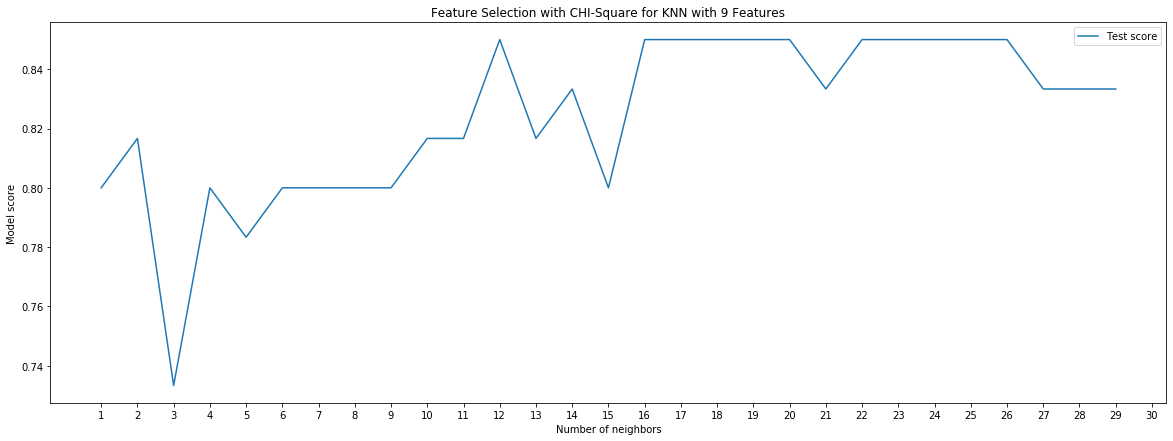

In [184]:
plt.figure(figsize=(20, 7))

plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Feature Selection with CHI-Square for KNN with 9 Features")

plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [185]:
train_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    model.fit(KNtrainX, KNtrainY)
    train_score.append(accuracy_score(KNtestY, model.predict(KNtestX)))

Maximum KNN score on the test data: 85.00%


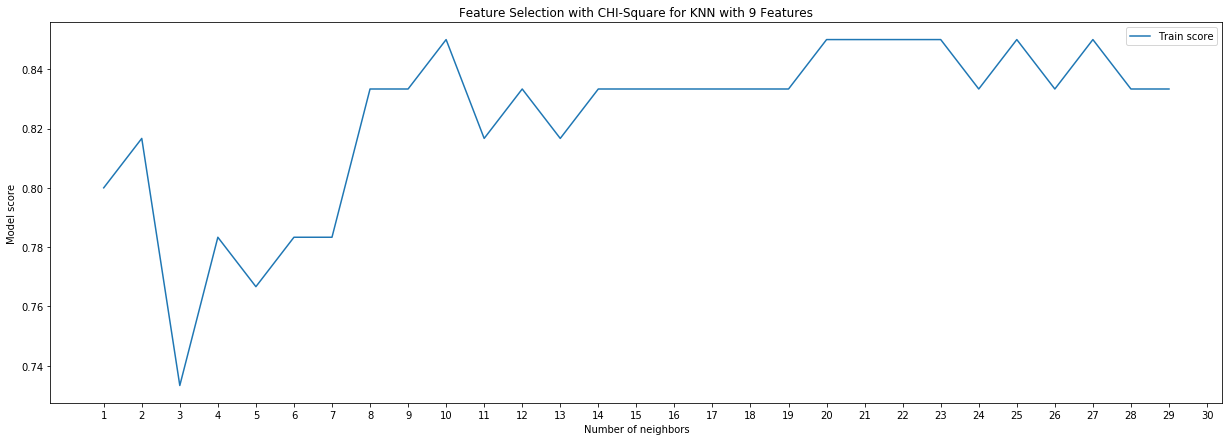

In [186]:
plt.figure(figsize=(21, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Feature Selection with CHI-Square for KNN with 9 Features")

plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [187]:
## Choosing K Value

In [188]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform',p=3)
    knn.fit(KNtrainX,KNtrainY)
    pred_i = knn.predict(KNtestX)
    error_rate.append(np.mean(pred_i != KNtestY))

Text(0, 0.5, 'Error Rate')

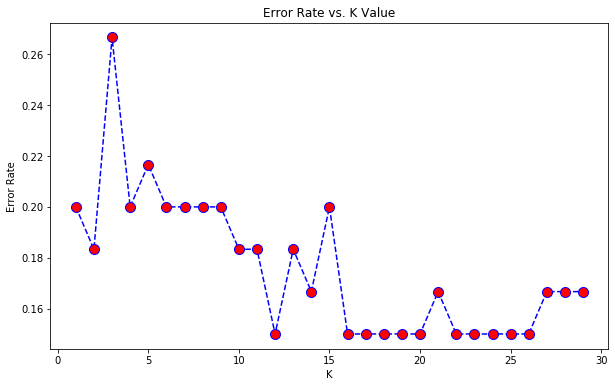

In [189]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Accuracy Comparison Table between classifiers

In [199]:
accuracy_frame2 = pd.DataFrame({'ML Models':['SVM',
                                   'LR',
                                   'XBoost',
                                   'RF',
                                   'KNN'], 
                         'Accuracy %':[svc_accuracy_score*100,
                                      logreg_accuracy_score*100,
                                      XGB_accuracy_score*100,
                                      RFC_accuracy_score*100,
                                      KN_accuracy_score*100]})
accuracy_frame2

,ML Models,Accuracy %
0,SVM,80.000000
1,LR,83.333333
2,XBoost,76.666667
3,RF,73.333333
4,KNN,85.000000


In [200]:
FinalPLot=accuracy_frame2.sort_values(by=['Accuracy %'])

In [201]:
FinalPLot

,ML Models,Accuracy %
3,RF,73.333333
2,XBoost,76.666667
0,SVM,80.000000
1,LR,83.333333
4,KNN,85.000000


[Text(0.5, 1.0, '9 Features of Chi-Square Performance Comparison')]

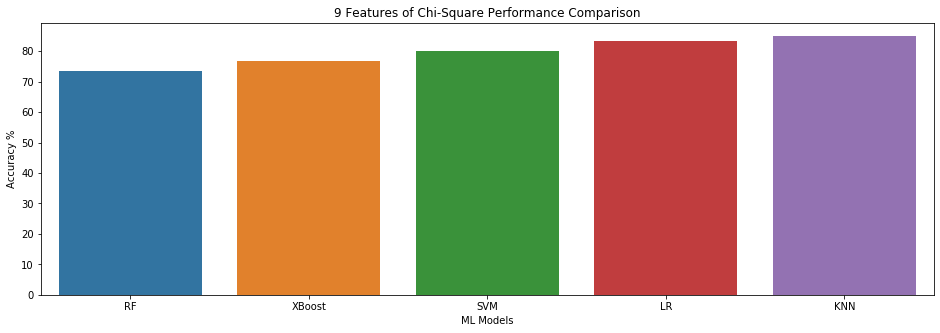

In [202]:
plt.figure(figsize=(16,5))
sns.barplot(x='ML Models',y='Accuracy %',data=FinalPLot).set(title='9 Features of Chi-Square Performance Comparison')

Text(0.5, 1.0, '9 Features of Chi-Square Performance Comparison')

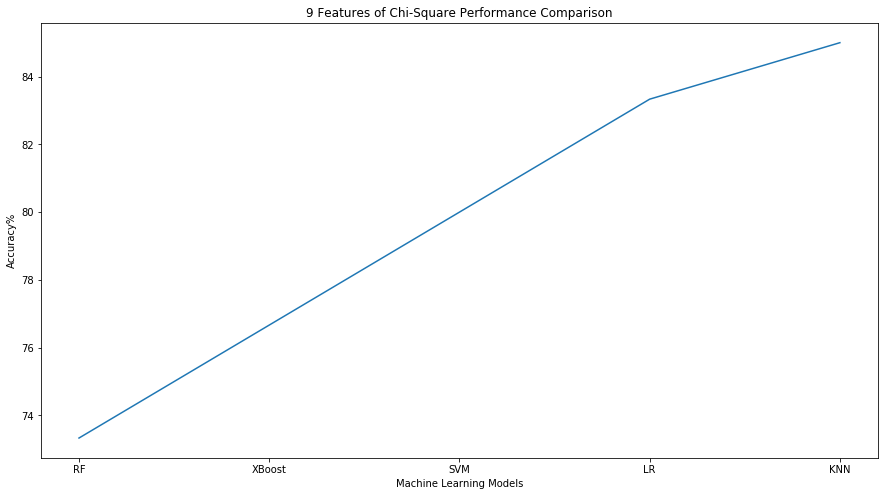

In [203]:
# draw lineplot
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
plt.gcf().set_size_inches(15, 8)

p=sns.lineplot( y="Accuracy %" ,x="ML Models", data=FinalPLot, sort= False)
p.set_xlabel("Machine Learning Models", fontsize = 10)
p.set_ylabel("Accuracy%", fontsize = 10)

p.set_title("9 Features of Chi-Square Performance Comparison")